# Juanane, Joanne J.
# Salary Prediction

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets\\Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


## 🔍 Part 2: Exploratory Data Analysis (EDA)

In [2]:
unique_job_titles = df['job_title'].nunique()

In [4]:
unique_job_titles

93

<p> There are 93 unique job titles in the dataset.</p>


In [5]:
average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().round(2).reset_index()

print("2. Result: Average Salary (USD) per Year:")
output_str = average_salary_by_year.to_string(index=False, float_format="{:,.2f}".format)
print(output_str)

2. Result: Average Salary (USD) per Year:
 work_year  salary_in_usd
      2020      92,302.63
      2021      94,087.21
      2022     133,379.51
      2023     148,954.56


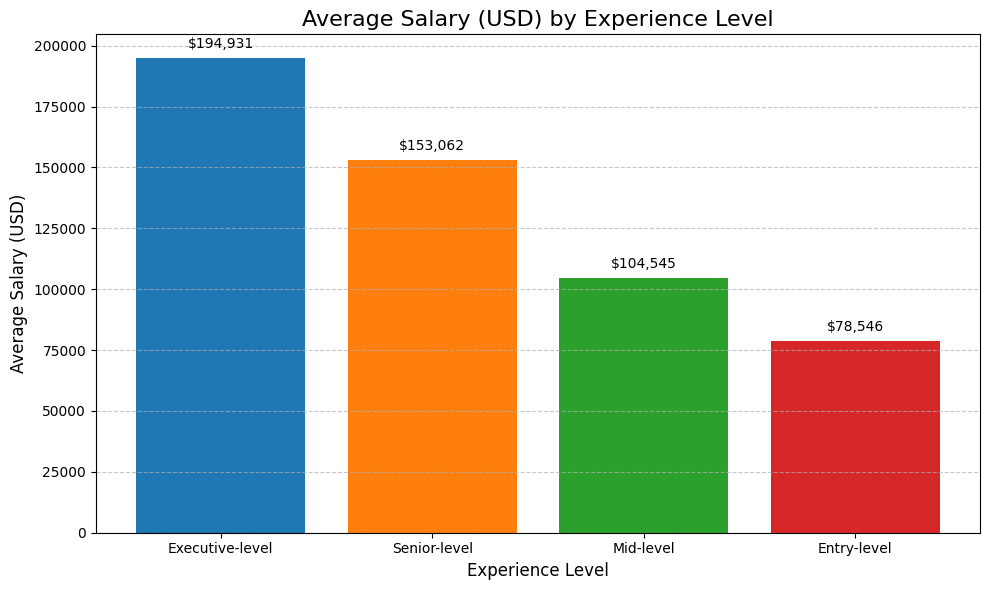

In [6]:
average_salary_by_exp = df.groupby('experience_level')['salary_in_usd'].mean().round(2).sort_values(ascending=False)


exp_level_map = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}

labels = [exp_level_map.get(level, level) for level in average_salary_by_exp.index]
values = average_salary_by_exp.values

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3000, f'${yval:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Salary (USD) by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.yticks(np.arange(0, max(values) * 1.1, 25000))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

In [8]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [9]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries


In [10]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

# 1. Does your model make reasonable predictions? Why or why not?
<p>The model is okay, but not great. It correctly knows that Senior workers get more money. But it misses big things like the company's country</p>


# 2. What are the limitations of using only `work_year` and `experience_level`?
<p> The model forgets the important stuff. It needs to know the where and how the company is and exact job like if its engineer or data analyst.</p>

# 3. How could you improve this model? (Think: more features, better encoding, etc.)
<p> Give more data like the country name and its size.</p>

# 4. Why is **R² not enough** to trust your predictions?
